<a href="https://colab.research.google.com/github/Saiesh-Halshikar/Supervised-Learning-with-model-comparison/blob/main/Supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Supervised Learning**

<br>

#### **Overview**

This case is about a bank (Axis bank) whose management wants to explore ways of
converting its liability customers to personal loan customers (while retaining them as
depositors). A campaign that the bank ran last year for liability customers showed a
healthy conversion rate of over 9% success. This has encouraged the retail marketing
department to devise campaigns with better target marketing to increase the success
ratio with minimal budget.

### **Objective:**
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

**Attribute Information:**

1. **ID** : Customer ID

2. **Age** : Customer's age 

3. **Experience** : #years of professional experience

4. **Income** : Annual income of the customer ($000)

5. **ZIP Code** : Home Address ZIP code.

6. **Family** : Family size of the customer

7. **CCAvg** : Avg. spending on credit cards per month ($000)

8. **Education** : Education Level. 1: Undergrad; 2: Graduate;
3: Advanced/Professional

9. **Mortgage** : Value of house mortgage if any. ($000)

10. **Personal Loan** : Did this customer accept the personal loan offered in the
last campaign?

11. **Securities Account** : Does the customer have a securities account with the bank?

12. **CD Account** : Does the customer have a certificate of deposit (CD)
 account with the bank?

13. **Online** : Does the customer use internet banking facilities?

14. **Credit card** : Does the customer use a credit card issued by
UniversalBank?

In [3]:
#Loading the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn import model_selection
from sklearn import metrics
    
    
%matplotlib inline

In [4]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [5]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.shape # checking the shape of the the dataset

(5000, 14)

In [7]:
df.isna().sum() #checking for null values in the dataset

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<br>

### **Univariate analysis** - Data Distributions 

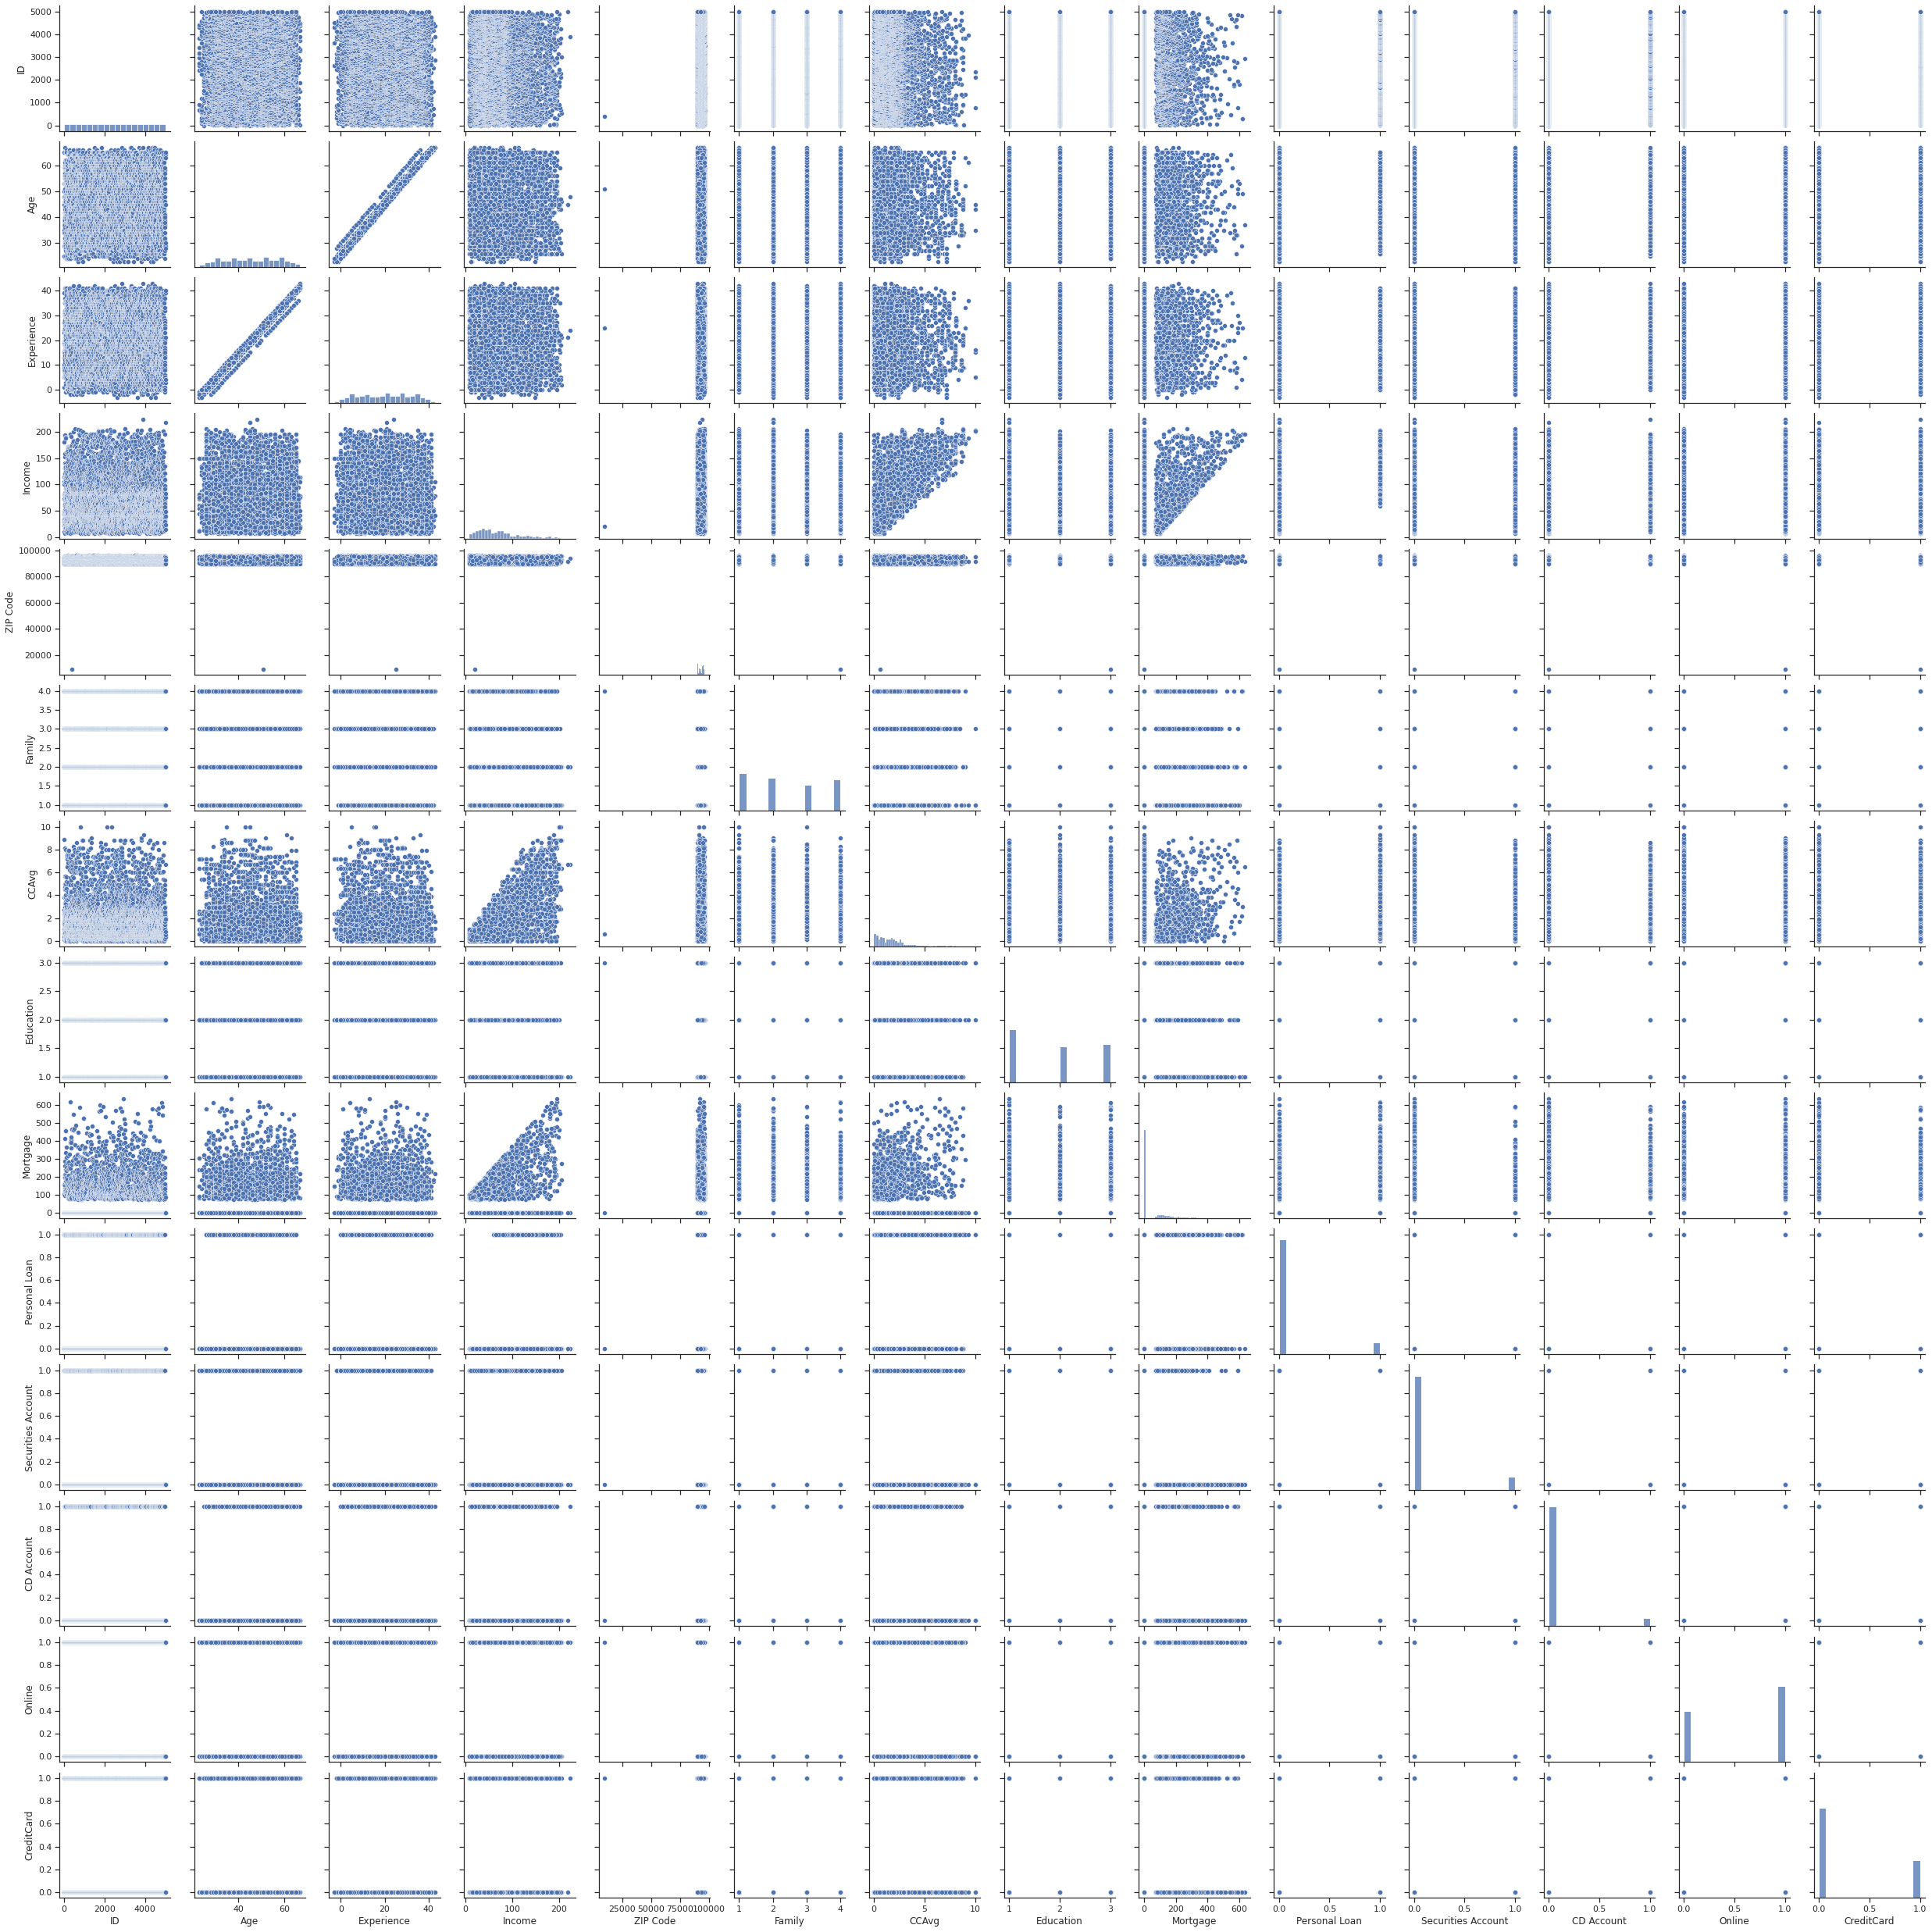

In [9]:
sns.pairplot(df)

In [10]:
df.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


From the above correlation table, we can deduce that the Customer ID provides less relationship with the rest of the data attributes, having negative correlation with almost all the other attrinutes. We will drop this column later in order to build our algorithm

**AGE:** From the boxplot below, we can identify that the age attribute is normally distributed. Also, we can confirm that majority of customers are falling between 30 years and 60 years of age.

<Axes: >

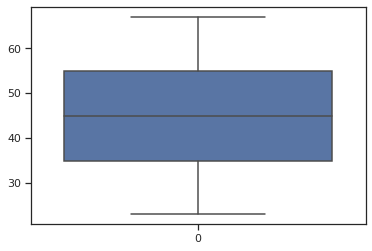

In [11]:
sns.boxplot(df['Age'])

<ipython-input-12-e57137fba157>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],color='g')


<Axes: xlabel='Age', ylabel='Density'>

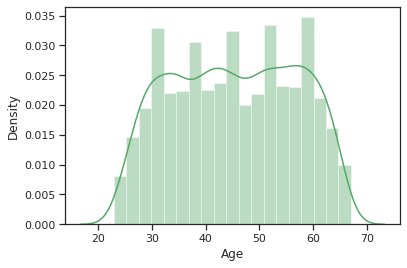

In [12]:
sns.distplot(df['Age'],color='g')

In [13]:
df['Age'].mean()

45.3384

In [14]:
df['Age'].median()

45.0

<br>

**Experience:** This attribute is normally distributed as well.  with more customer having experience concentrated around 10-30 years. Here the mean is equal to median(20). Also, it worth noting that there are some negative values present in Experience which could be as a result of wrong data input which shouldn't be the case. We will therefore replace these data points with the mean of the positive experience




<Axes: >

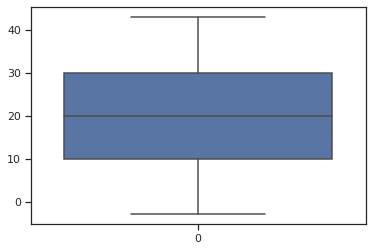

In [15]:
sns.boxplot(df['Experience'])

In [16]:
df['Experience'].mean()

20.1046

In [17]:
df['Experience'].median()

20.0

In [18]:
df[df['Experience'] < 0].head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0


In [19]:
df[df['Experience']<0]['Experience'].count() #checking for the existence of negative values in Experience column, there are 52 negative experiences count

52

**Income** is positively skewed. Majority of the customers have income between 45K and 55K. The boxplot below confirms the distribution.

<Axes: >

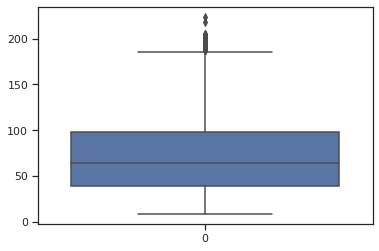

In [20]:
sns.boxplot(df['Income'])

<br>

**CCAvg** is also a positively skewed variable with an average spending falling between 0K-10K and majority spends less than 2.5K

<Axes: >

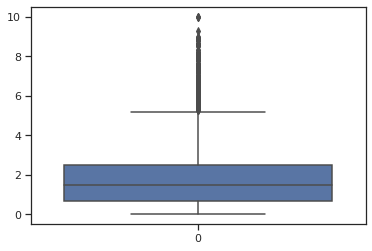

In [21]:
sns.boxplot(df['CCAvg'])

<Axes: >

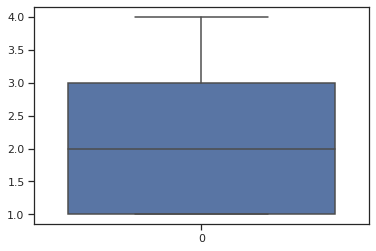

In [22]:
sns.boxplot(df['Family'])

<br>

Mortgage has majority of the individuals having a mortgage of less than 40K with a huge range of 0k-635K

<Axes: >

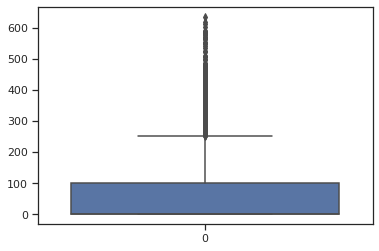

In [23]:
sns.boxplot(df['Mortgage'])

<br>

### **Let's Clean The Negative Experience**

In [24]:
PositiveExp = df.loc[df['Experience'] >0]
NegEXP= df.Experience < 0
Col_Name = 'Experience'
my_list = df.loc[NegEXP]['ID'].tolist() #list of all the IDs of the rows with negative experience

In [25]:
#my_list

**Explanation of the code below:**

For the record with the ID, get the value of Age column

For the record with the ID, get the value of Education column

Filter the records matching the above criteria from the data frame which has records with positive experience and take the median

Apply the median back to the location which had negative experience

In [26]:
for id in my_list:
    age = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    education = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    filtered_df = PositiveExp[(PositiveExp.Age == age) & (PositiveExp.Education == education)]
    Exp =filtered_df['Experience'].median()
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = Exp

In [27]:
# checking if there are records with negative experience
df[df['Experience'] < 0]['Experience'].count()

0

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


<br>

**Let's see if there's any relationship between personal loan and mortgages.**

<Axes: xlabel='Education', ylabel='Income'>

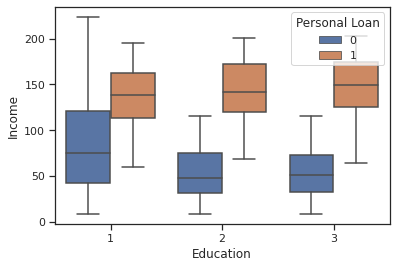

In [29]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)

**Observation :**

It is observed that the customers who have education level to be 1 are having more income, however, customers who have taken the personal loan are also having the same income levels

<br>

We can also see the top 5 locations applied for personal loans

In [30]:
top5_loc = df[df['Personal Loan']==1]['ZIP Code'].value_counts().head(5)
top5_loc

94720    19
94305    13
92093     9
90095     8
94304     8
Name: ZIP Code, dtype: int64

<Axes: xlabel='Education', ylabel='Mortgage'>

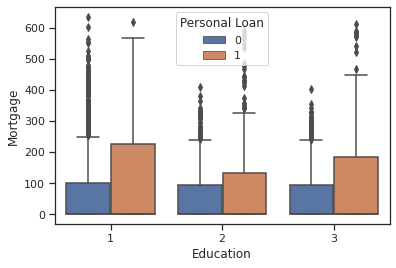

In [31]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

**Observation :**

It is observed that customers who have personal loans also have high mortgage

**Is there any influence of family size on whether a customer accepts a personal loan or not?**

<Axes: xlabel='Family', ylabel='count'>

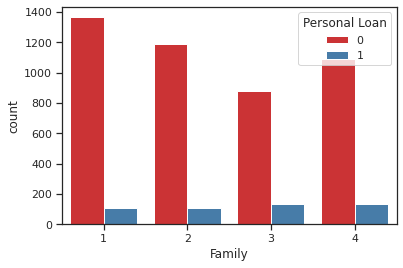

In [32]:
sns.countplot(x='Family',data=df,hue='Personal Loan',palette='Set1')

In [33]:
stats.ttest_ind(df[df["Personal Loan"] == 1]['Family'] , df[df['Personal Loan'] == 1]['Family'])

Ttest_indResult(statistic=0.0, pvalue=1.0)

**Observation**

From the observation above, Family size seems to have no impact on decision to take a loan.

<Axes: xlabel='CD Account', ylabel='count'>

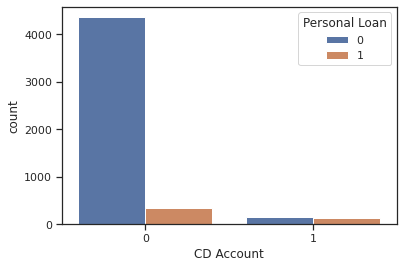

In [34]:
sns.countplot(x='CD Account',hue='Personal Loan',data=df)

**Observation:**

It is observed that customers who do not have CD account , also do not have loan as well. Though this seems to be majority. But almost all customers who has CD account has loan as well

<br>

**Personal Loan Vs Credit Card Average**

<ipython-input-35-5f20b4d85dde>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'b')
<ipython-input-35-5f20b4d85dde>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')


<Axes: xlabel='CCAvg', ylabel='Density'>

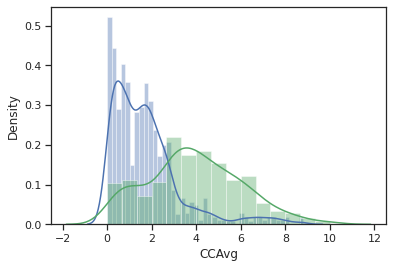

In [35]:
sns.distplot( df[df['Personal Loan'] == 0]['CCAvg'], color = 'b')
sns.distplot( df[df['Personal Loan'] == 1]['CCAvg'], color = 'g')

In [36]:
df[df['Personal Loan'] == 0]['CCAvg'].median()*1000

1400.0

In [37]:
df[df['Personal Loan'] == 1]['CCAvg'].median()*1000

3800.0

**Observation:** 

The graph show persons who have personal loan have a higher credit card average.

Average credit card spending with a median of 3800 dollar indicates a higher probability of personal loan. Also, Lower credit card spending with a median of 1400 dollars is less likely to take a loan.

<br>

## **Correlation comparison with heat map**

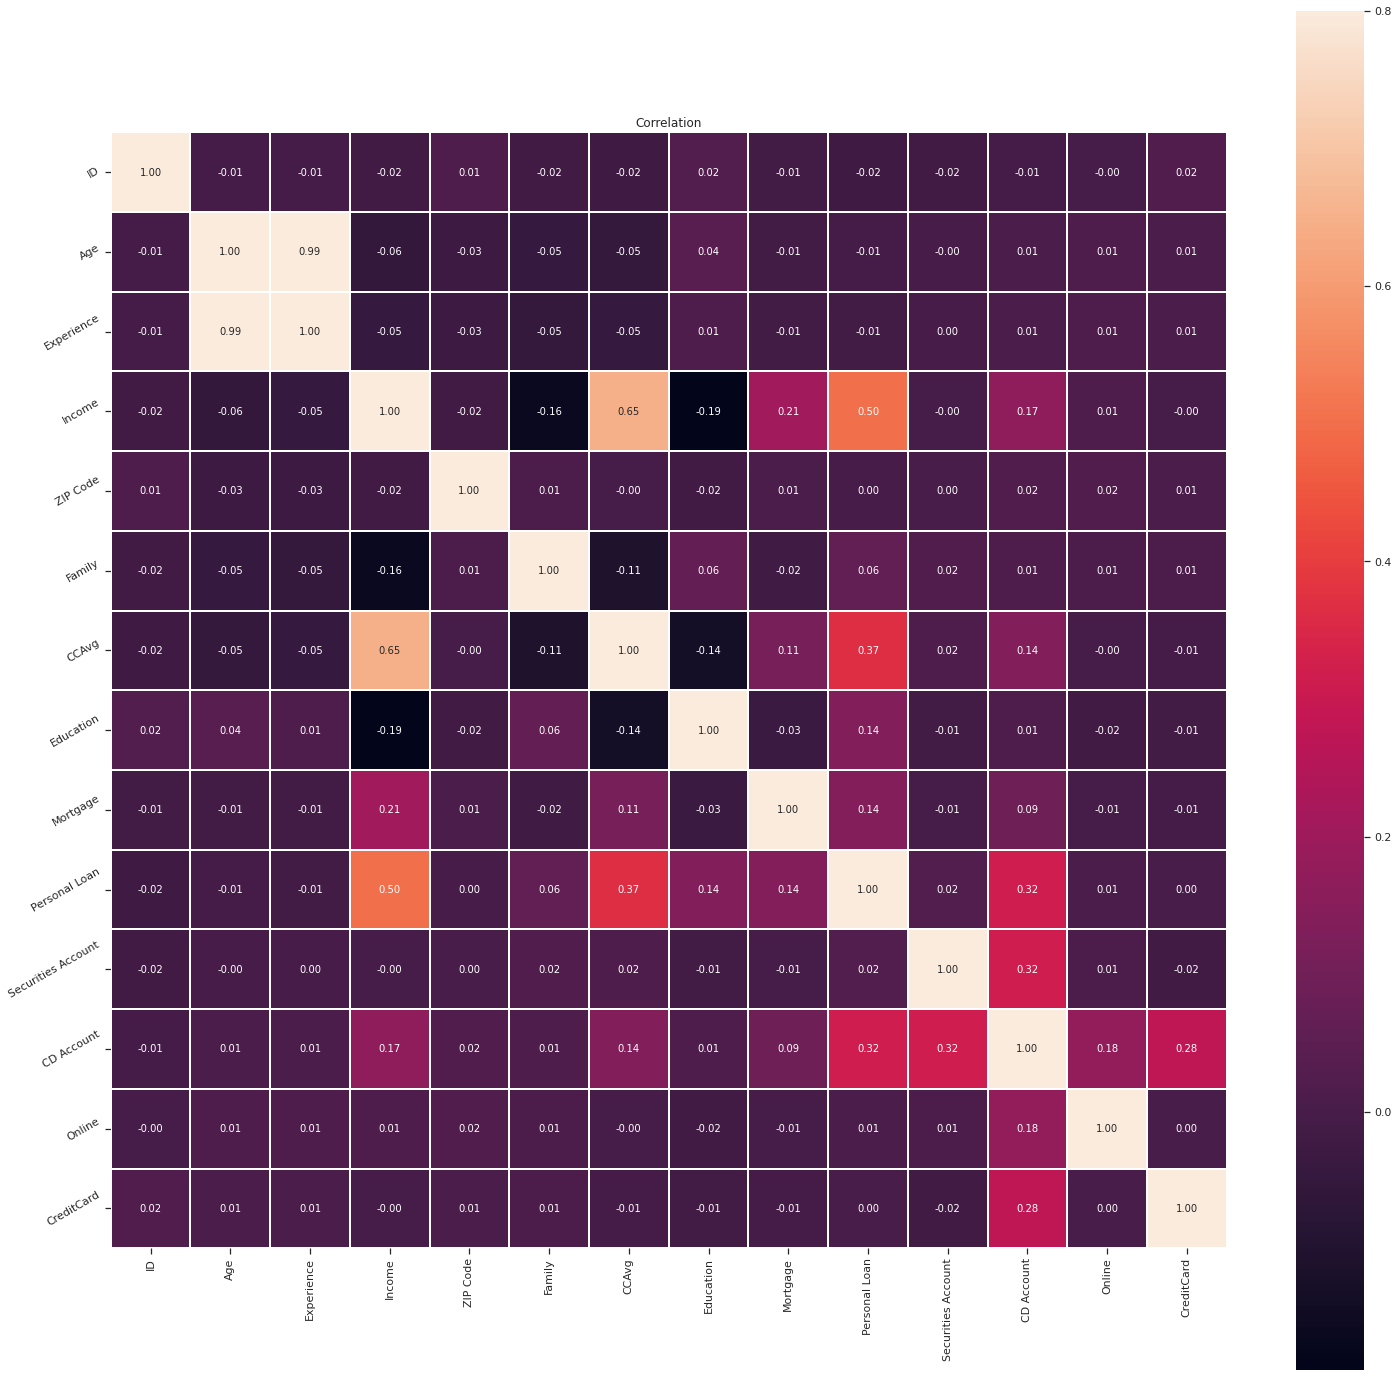

In [38]:

from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()


**Observation**

Age and Experoence is highly corelated

Income and CCAvg also corelated

<br>

## **Splittin Data to Train And Test**

In [39]:
train_set, test_set = train_test_split(df.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=80)

In [40]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

<br>

# **Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

In [42]:
Classifier= LogisticRegression()
case=Classifier.fit(train_set, train_labels).predict_proba(test_set)

In [43]:
case

array([[0.89332399, 0.10667601],
       [0.93631934, 0.06368066],
       [0.99687771, 0.00312229],
       ...,
       [0.99542263, 0.00457737],
       [0.3467993 , 0.6532007 ],
       [0.9612741 , 0.0387259 ]])

In [44]:
#Computing ROC Curve for Logistic Regression

fpr,tpr,thresholds=roc_curve(test_labels,case[:,1])
roc1=auc(fpr,tpr)

print("Area under the ROC Curve is : %f" % roc1)

Area under the ROC Curve is : 0.917984


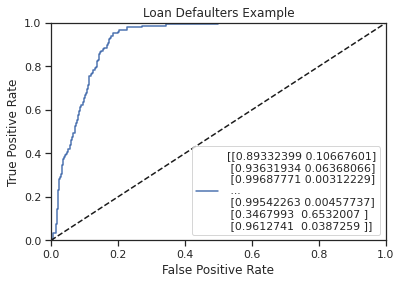

In [45]:
#Plot the ROC Curve

import pylab as pl

pl.clf()
pl.plot(fpr,tpr,label=case)
pl.plot([0,1],[0,1],'k--')
pl.xlim(0.0,1.0)
pl.ylim(0.0,1.0)
pl.xlabel("False Positive Rate")
pl.ylabel('True Positive Rate')
pl.title('Loan Defaulters Example')
pl.legend(loc="lower right")

In [46]:
case1=Classifier.fit(train_set, train_labels)
logpred=case1.predict(test_set)

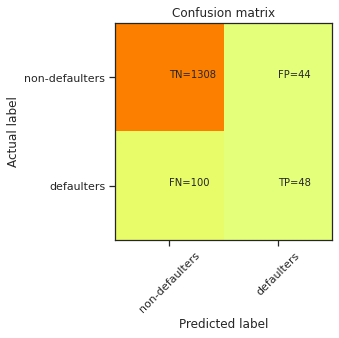

In [47]:
conf=metrics.confusion_matrix(test_labels,logpred)
plt.clf()
plt.imshow(conf,interpolation='nearest',cmap=plt.cm.Wistia)
classnames=['non-defaulters','defaulters']
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks=np.arange(len(classnames))
plt.xticks(tick_marks,classnames,rotation=45)
plt.yticks(tick_marks,classnames)
s=[['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j]) + '=' + str(conf[i][j]))
plt.show()

The probability of belonging to non-defaulters class is higher than the probability of belonging to defaulters in all cases

In [48]:
recall=49/(49+99)*100
recall

33.108108108108105

Recall of only 33% 

The probability of beloging to non-defailters class is higher than the probability of belonging to defaulters class

<br>

## **Decision Tree Classifier**

In [49]:
model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)
model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [50]:
dstpredictions=model.predict(test_set)

In [51]:
model.score(test_set , test_labels)*100

97.39999999999999

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
dstmat = pd.DataFrame(confusion_matrix(test_labels, dstpredictions).T, index=['No', 'Yes'], columns=['No', 'Yes'])
dstmat.index.name = 'Predicted'
dstmat.columns.name = 'True'
dstmat


True,No,Yes
Predicted,,
No,1346,33
Yes,6,115


<br>

## **Naive Bayes**

In [53]:
nb_model = GaussianNB()
nb_model.fit(train_set, train_labels)

prediction = nb_model.predict(test_set)
nb_model.score(test_set,test_labels)*100

90.06666666666666

In [54]:
cmat = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cmat.index.name = 'Predicted'
cmat.columns.name = 'True'
cmat

True,No,Yes
Predicted,,
No,1281,78
Yes,71,70


<br>

## **Random Forest Classifier**

In [55]:
rf_model = RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(train_set, train_labels)


RandomForestClassifier(max_depth=2, random_state=0)

<Axes: >

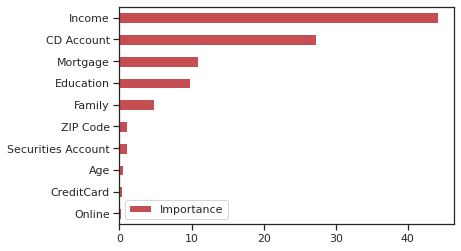

In [56]:
fmportance = pd.DataFrame({'Importance':rf_model.feature_importances_*100}, index=train_set.columns)
fmportance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [57]:
predicted_random=rf_model.predict(test_set)
rf_model.score(test_set,test_labels)*100

92.06666666666666

In [58]:
train_set_indep = df.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

<br>

## **KNN Classifier**

In [59]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
KNNpredicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, KNNpredicted)
acc*100

94.46297531687792

<br>

## **Model comparison**

In [60]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')



KNN: 0.898600 (0.008902)
CART: 0.982000 (0.004899)
NB: 0.885600 (0.010385)
RF: 0.987000 (0.004669)


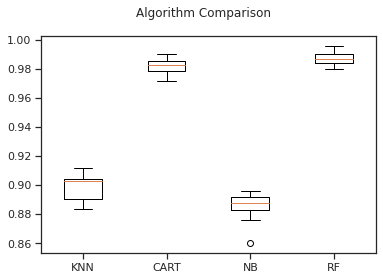

In [62]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Conclusion**

From our problem statement above, the major aim of the universal bank is to convert their liability customers into loan customers and therefore they need information about the connection between the variables given in the dataset. We considered four(4) classification algorithms in this study and can be infer from the above graph that Decision Tree algorithm have the highest accuracy and we will consider it as our final model